# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \text{...}$$

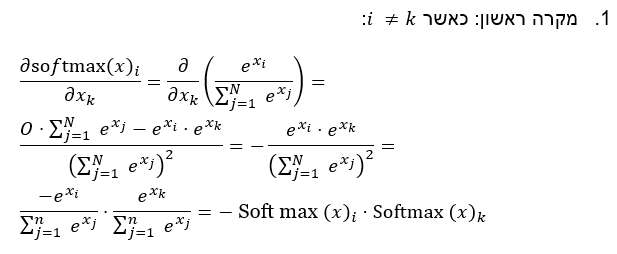

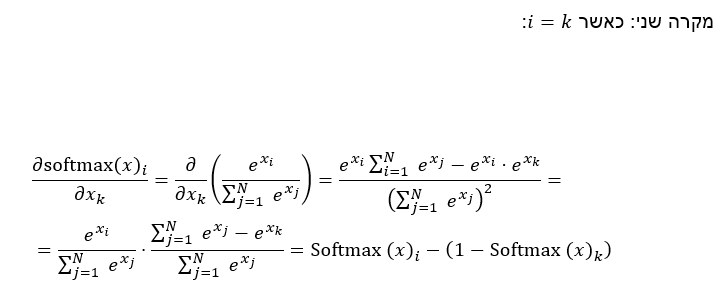

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = \text{Go for it}$$
$$\frac{\partial \text{CE}(y, \hat{y})}{\partial \theta_k} = \frac{\partial}{\partial \theta_k} \left(-\sum_i y_i \log(\hat{y}_i)\right)$$

$$-\sum_i y_i \cdot \frac{\partial}{\partial \theta_k} \log(\hat{y}_i) = -\sum_i \frac{y_i}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial \theta_k}$$




$$I = \left\{
\begin{array}{cl}
1 & , \text{ if } j = k \\
0 & , \text{ if } j \neq k
\end{array} \right.$$

$$\frac{\partial \hat{y}_i}{\partial \theta_k} = \left\{
\begin{array}{ll}
\hat{y}_i (1 - \hat{y}_k) & , \text{ if } i = k \\
-\hat{y}_i \hat{y}_k & , \text{ if } i \neq k
\end{array} \right. = \hat{y}_i (I - \hat{y}_k)$$

$$= -\sum_i \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i (I - \hat{y}_k) = -\sum_i y_i I + \hat{y}_k \sum_i y_i = -\sum_i y_i I + \hat{y}_k$$


$$\Rightarrow -\hat{y}_k + \hat{y}_k \quad \text{if } I = 1 \Leftrightarrow j = k$$

$$\Rightarrow \hat{y}_k \quad \text{if } I = 0 \Leftrightarrow j \neq k$$


# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [2]:
import numpy as np

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)


def d_tanh(x):
    return 1 - tanh(x)**2


def d_softmax(x):
    x_reshaped = x.reshape(-1)
    print(x_reshaped.shape)
    return torch.diagflat(x_reshaped) - torch.dot(x_reshaped, x_reshaped.T)

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [4]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

100%|██████████| 9912422/9912422 [00:00<00:00, 109002441.52it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66594664.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 170203809.63it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9320219.55it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        z1 = torch.matmul(x, self.W1) + self.b1
        self.z1 = z1
        h1 = self.activation_func(z1)
        self.h1 = h1
        z2 = torch.matmul(h1, self.W2) + self.b2
        self.z2 = z2
        y_hat = softmax(z2)
        return y_hat

    def backward(self, X, y, y_hat, lr=.1):
        batch_size = BATCH_SIZE
        dl_dz2 = (1 / batch_size) * (y_hat - y)
        dl_dh = torch.matmul(dl_dz2, torch.t(self.W2))
        dl_dz1 = dl_dh * d_sigmoid(self.h1)

        self.W1 -= lr * torch.matmul(torch.t(X), dl_dz1)
        self.b1 -= lr * torch.matmul(torch.t(dl_dz1), torch.ones(batch_size))
        self.W2 -= lr * torch.matmul(torch.t(self.h1), dl_dz2)
        self.b2 -= lr * torch.matmul(torch.t(dl_dz2), torch.ones(batch_size))

In [6]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [7]:
from tqdm import tqdm

def train(model):
    mean_train_loss_history = []
    mean_test_loss_history = []
    mean_train_acc_history = []
    mean_test_acc_history = []

    for epoch in tqdm(range(EPOCHS)):
        train_loss_history = []
        test_loss_history = []
        train_acc_history = []
        test_acc_history = []
        # Train the model
        for i, (x, y) in enumerate(train_dataloader):
            # Forward pass
            y_hat = model.forward(x)
            # Compute loss
            loss = cross_entropy(y, y_hat)
            # Backward pass
            model.backward(x, one_hot(y), y_hat)
            # Track loss and accuracy
            train_loss_history.append(loss.item())
            train_acc_history.append((y_hat.argmax(dim=1) == y).sum().item() / y.size(0))
        mean_train_loss = np.mean(train_loss_history)
        mean_train_acc = np.mean(train_acc_history)

        # Evaluate the model on the test set
        with torch.no_grad():
          for i, (x, y) in enumerate(test_dataloader):
              # Forward pass
              y_hat = model.forward(x)

              # Compute loss
              loss = cross_entropy(y, y_hat)

              # Track loss and accuracy
              test_loss_history.append(loss.item())
              test_acc_history.append((y_hat.argmax(dim=1) == y).sum().item() / y.size(0))
          mean_test_loss = np.mean(test_loss_history)
          mean_test_acc = np.mean(test_acc_history)

        # Print epoch results
        mean_train_loss_history.append(mean_train_loss)
        mean_test_loss_history.append(mean_test_loss)
        mean_train_acc_history.append(mean_train_acc)
        mean_test_acc_history.append(mean_test_acc)
    return mean_train_loss_history, mean_test_loss_history, mean_train_acc_history, mean_test_acc_history


In [14]:
def draw_graphs(all_model_data):
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    for lr, model_data in all_model_data:
        mean_train_loss_history, mean_test_loss_history, mean_train_acc_history, mean_test_acc_history = model_data

        # Plotting Train Loss
        axs[0, 0].plot(mean_train_loss_history, label=f'Train Loss (LR: {lr})', linestyle='-', marker='o')

        # Plotting Test Loss
        axs[0, 1].plot(mean_test_loss_history, label=f'Test Loss (LR: {lr})', linestyle='--', marker='x')

        # Plotting Train Accuracy
        axs[1, 0].plot(mean_train_acc_history, label=f'Train Accuracy (LR: {lr})', linestyle='-', marker='o')

        # Plotting Test Accuracy
        axs[1, 1].plot(mean_test_acc_history, label=f'Test Accuracy (LR: {lr})', linestyle='--', marker='x')

    axs[0, 0].set_title('Train Loss')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].set_title('Test Loss')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    axs[1, 0].set_title('Train Accuracy')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    axs[1, 1].set_title('Test Accuracy')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

In [11]:
set_seed(SEED)
lr = 0.01
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

In [12]:
model_data = train(model)

100%|██████████| 16/16 [03:14<00:00, 12.19s/it]


In [16]:
type(model_data)

tuple

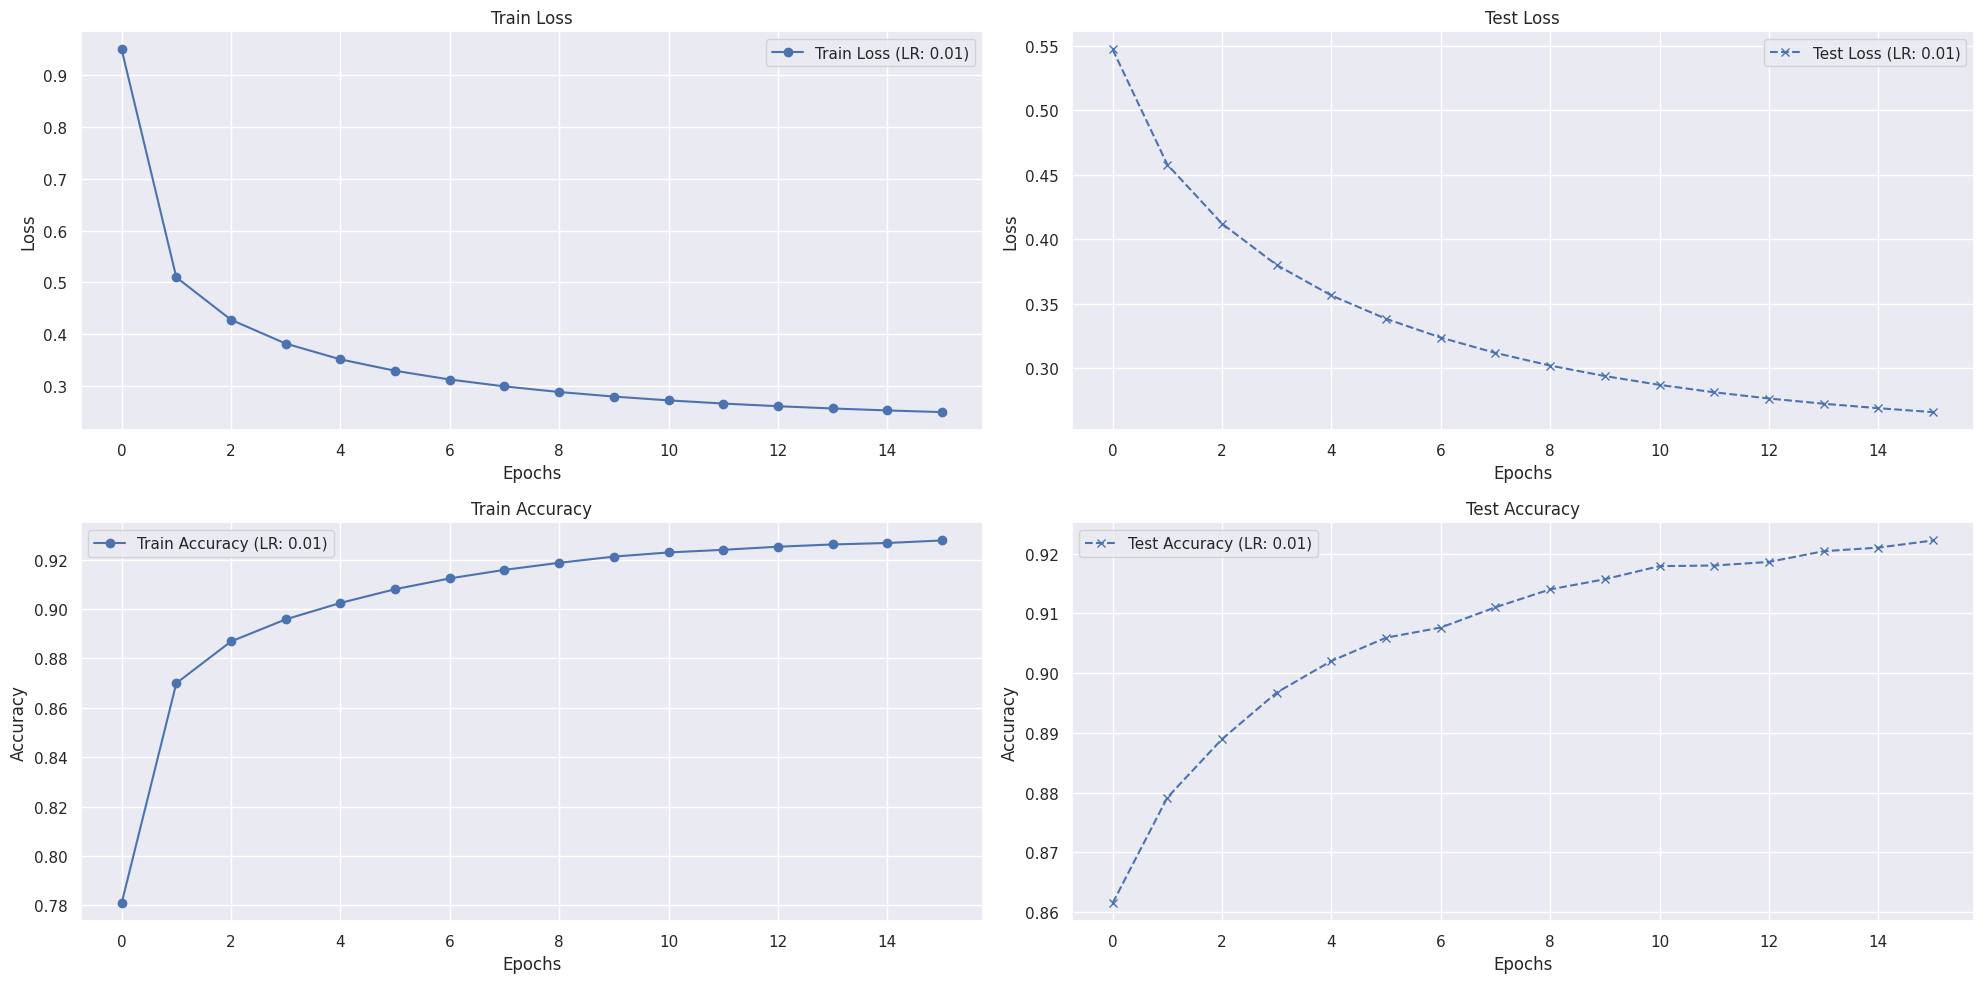

In [18]:
all_model_data = [(lr, model_data)]
draw_graphs(all_model_data)

In [19]:
students_ids = "205963168_205671266"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

In [20]:
possible_lrs = [0.01, 0.1, 0.5]
all_model_data = []

for lr in possible_lrs:
    print(f"Current learning rate: {lr}")
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)
    model_data = train(model)
    all_model_data.append((lr, model_data))

Current learning rate: 0.01


100%|██████████| 16/16 [03:09<00:00, 11.86s/it]


Current learning rate: 0.1


100%|██████████| 16/16 [03:07<00:00, 11.70s/it]


Current learning rate: 0.5


100%|██████████| 16/16 [03:02<00:00, 11.38s/it]


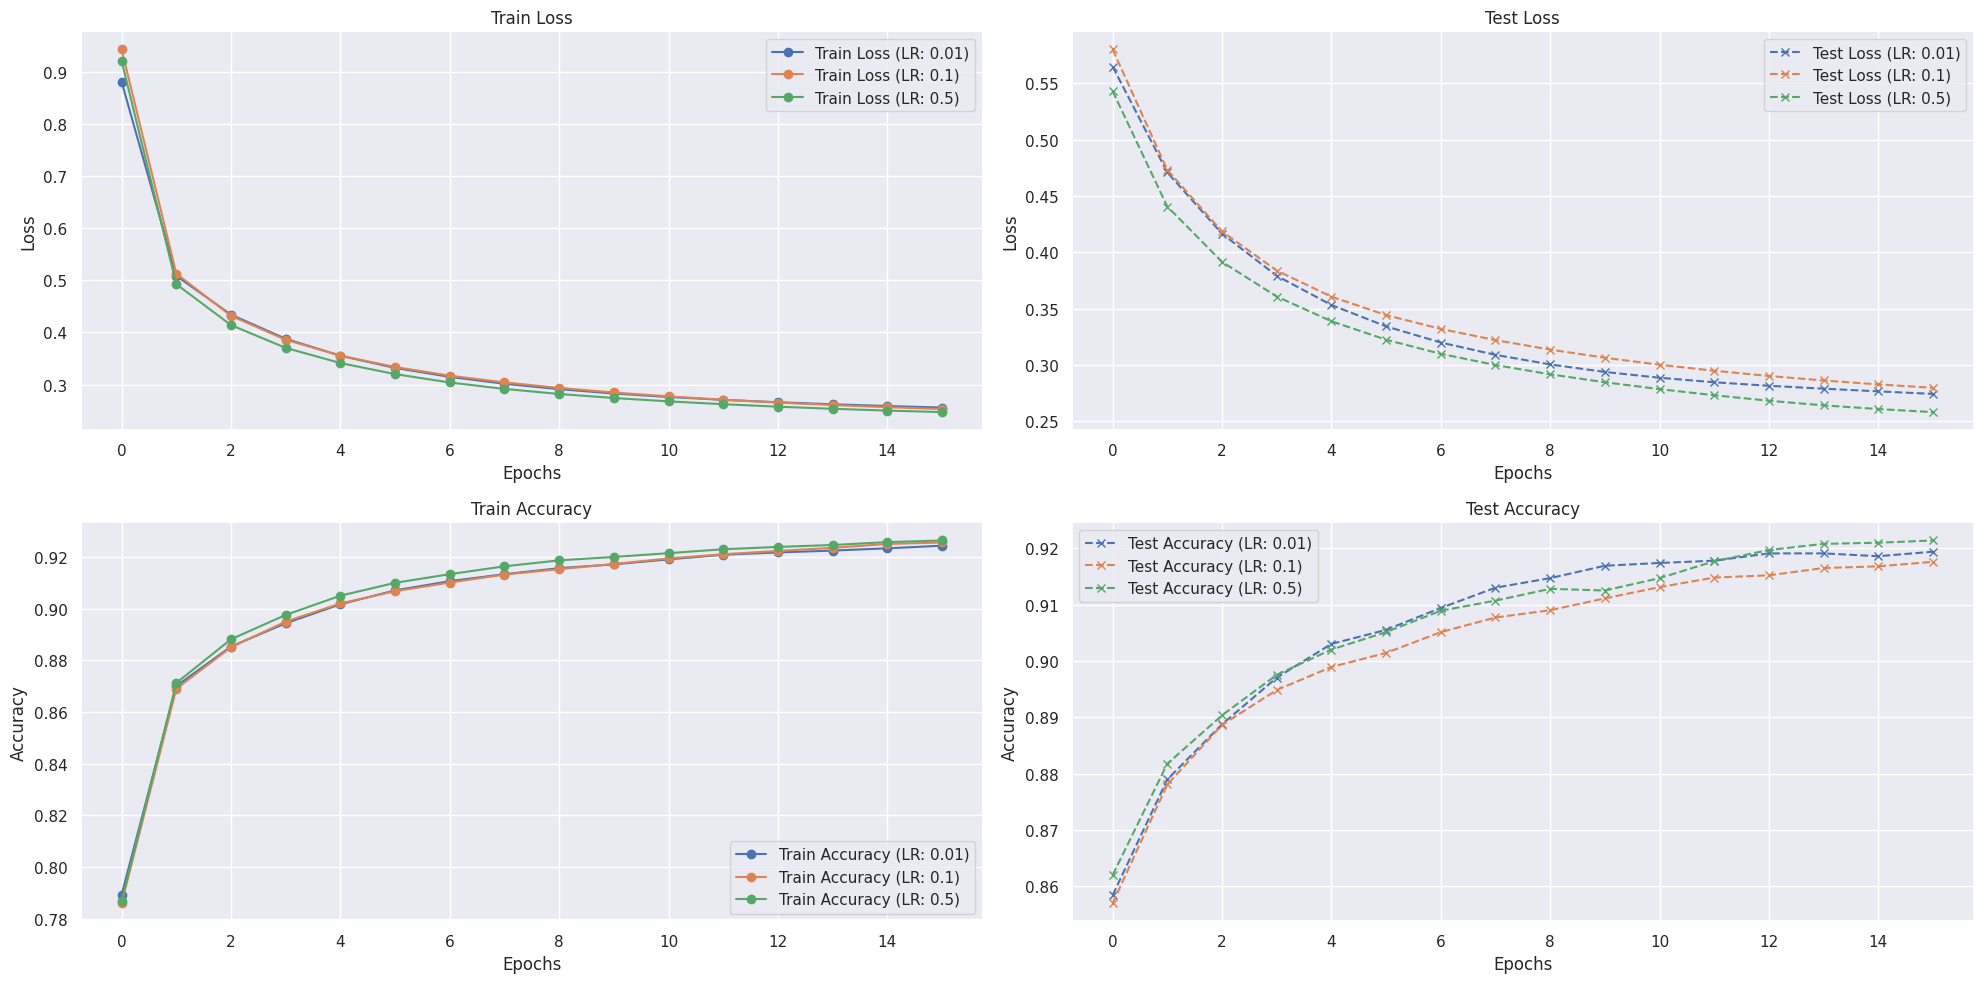

In [21]:
draw_graphs(all_model_data)

We chose to show these graphs so it is easily visible which LRs did better than others.
When viewing our loss functions, it seems that in the train set, the lines are pretty tight across all epochs, settling at around the same loss value.<br>
At the test loss graph, we see that both the lower LR values do settle with a better loss score, and the lower one (0.01) got there a little faster.<br>
Expectedly, the accuracy graphs maintain the same trends - where in the train graph, all graphs are fairly tightly packed, and the test set shows the lower two LR values with a clear lead over the higher one.<br>
Overall, it seems that over all our graphs, the middle one, 0.1, did best, followed closely by 0.01, while the 0.5 LR value seems to be a bit too high, which is consistent with what we have seen in our lectures.


# Question 3

[link text](https://)## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.

<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [5]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import pandas as pd
import os

import matplotlib.pyplot as plt

In [6]:
class SuperImageDataset(Dataset):
    def __init__(self, filepath, transform=None):
        self.filepath = filepath
        self.transform = transform

        # Create a path-to-label dictionary
        self.path_to_label_dict = self._create_path_to_label_dict()

        self.paths = list(self.path_to_label_dict.keys())
        self.labels = list(self.path_to_label_dict.values())
        
    def _create_path_to_label_dict(self):
        # initializing an empty dict
        path_to_label = {}
        
        file_path = self.filepath
        
        #open the file and read line by line
        with open(file_path, 'r') as file:
            for line in file:
                # Split eack line into path and label
                img_path, label = line.strip().split(', ')
                path_to_label[img_path] = int(label)
        
        
        
        return path_to_label

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        img_path = self.paths[index]
        label = self.labels[index]

        # Load image
        image = Image.open(img_path)

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

In [11]:
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])


transform_val_test = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_path = "/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/GroceryStoreDataset/train.txt"
test_path = "/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/GroceryStoreDataset/test.txt"
val_path = "/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/GroceryStoreDataset/val.txt"

train_dataset = SuperImageDataset(filepath=train_path, transform=transform_train)
test_dataset = SuperImageDataset(filepath=test_path, transform=transform_val_test)
val_dataset = SuperImageDataset(filepath=val_path, transform=transform_val_test)


train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)


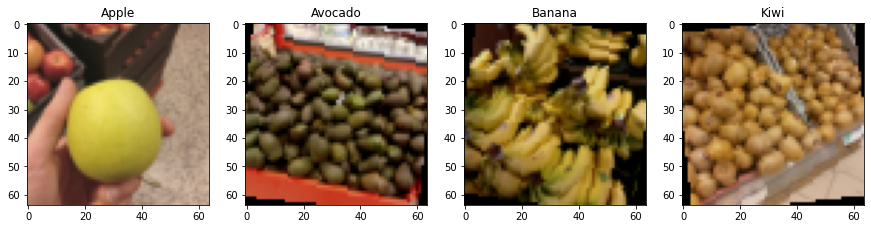

In [12]:
# print a sample from each class

label_to_name = {0: 'Apple', 1: 'Avocado', 2: 'Banana', 3: 'Kiwi', 4: 'Lemon', 5: 'Lime', 6: 'Mango',
                7: 'Melon', 8: 'Nectarine', 9: 'Orange', 10: 'Papaya', 11: 'Passion-Fruit',
                 12: 'Peach', 13: 'Pear', 14: 'Pineapple', 15: 'Plum', 16: 'Pomegranate', 17: 'Red-Grapefruit',
                 18: 'Satsumas', 19: 'Juice', 20: 'Milk', 21: 'Oatghurt', 22: 'Oat-Milk', 23: 'Sour-Cream',
                 24: 'Sour-Milk', 25: 'Soyghurt', 26: 'Soy-Milk', 27: 'Yoghurt', 28: 'Asparagus',
                 29: 'Aubergine', 30: 'Cabbage', 31: 'Carrots', 32: 'Cucumber', 33: 'Garlic',
                 34: 'Ginger', 35: 'Leek', 36: 'Brown-Cap-Mushroom', 37: 'Onion', 38: "Papper",
                 39: 'Potato', 40: 'Red-Beet', 41: 'Tomato', 42: 'Zucchini'
                }

labels_seen = []
transform_to_pil = transforms.ToPILImage()

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for image, label in train_dataset:
    if label not in labels_seen:
        labels_seen.append(label)
        image = transform_to_pil(image)
        axs[len(labels_seen) - 1].imshow(image)
        axs[len(labels_seen) - 1].set_title(label_to_name[label])
    if len(labels_seen) == 4:
        break

plt.show()

In [23]:
import torch.nn.functional as F

num_epochs = 12
batch_size = 32
learning_rate = 0.001
class GroceryStoreCNN(nn.Module):
    def __init__(self):
        super(GroceryStoreCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # Adjust the input size of fc1 based on the output size of layer4
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 43)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        return F.log_softmax(out, dim=1)

In [24]:
import torch.optim.lr_scheduler as lr_scheduler

model = GroceryStoreCNN()

if torch.cuda.is_available():
    model = model.cuda()

# convert all the weights tensors to cuda()
# Loss and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)  # Example L2 regularization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

model.train()

print('number of parameters: ', sum(param.numel() for param in model.parameters()))

number of parameters:  2509099


Epoch 1/12, Train Loss: 3.0247, Train Accuracy: 19.55%, Val Loss: 2.7529, Val Accuracy: 24.66%
Epoch 2/12, Train Loss: 2.3211, Train Accuracy: 31.10%, Val Loss: 2.3930, Val Accuracy: 24.32%
Epoch 3/12, Train Loss: 1.9314, Train Accuracy: 39.66%, Val Loss: 2.4694, Val Accuracy: 33.11%
Epoch 4/12, Train Loss: 1.6308, Train Accuracy: 48.71%, Val Loss: 2.2002, Val Accuracy: 35.81%
Epoch 5/12, Train Loss: 1.4167, Train Accuracy: 52.20%, Val Loss: 2.0408, Val Accuracy: 41.22%
Epoch 6/12, Train Loss: 1.2836, Train Accuracy: 57.65%, Val Loss: 2.2585, Val Accuracy: 41.55%
Epoch 7/12, Train Loss: 1.1576, Train Accuracy: 60.87%, Val Loss: 2.3535, Val Accuracy: 36.82%
Epoch 8/12, Train Loss: 1.0922, Train Accuracy: 63.52%, Val Loss: 2.4555, Val Accuracy: 37.84%
Epoch 9/12, Train Loss: 0.9366, Train Accuracy: 69.09%, Val Loss: 2.4442, Val Accuracy: 43.24%
Epoch 10/12, Train Loss: 0.8627, Train Accuracy: 70.68%, Val Loss: 2.6680, Val Accuracy: 40.20%
Epoch 11/12, Train Loss: 0.6721, Train Accuracy: 

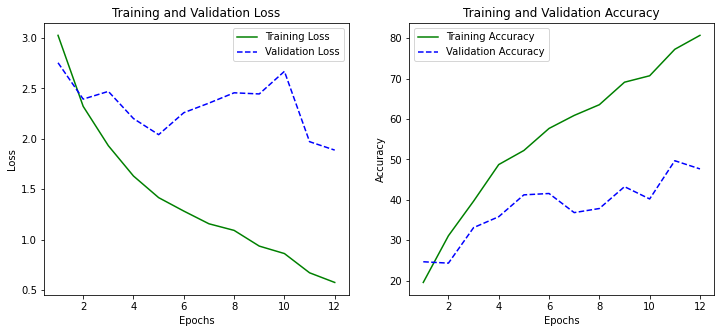

In [25]:
import matplotlib.pyplot as plt

# Assuming all previous setup code (model, dataloaders, etc.) is defined above this

# Initialize lists to monitor loss and accuracy
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait after min has been hit
patience_counter = 0

for epoch in range(num_epochs):
    model.train()  # Make sure model is in training mode
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    for images, labels in train_dataloader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_acc = 100 * correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_acc)

    # Validation phase
    model.eval()  # Make sure model is in evaluation mode
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():  # No need to track gradients
        for images, labels in val_dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_epoch_loss = val_running_loss / len(val_dataloader)
    val_epoch_acc = 100 * correct_val / total_val
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_acc)

    scheduler.step()

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter > patience:
        print("Early stopping triggered")
        break

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.2f}%, Val Loss: {val_epoch_loss:.4f}, Val Accuracy: {val_epoch_acc:.2f}%')

# Adjusted plotting to handle early stopping
epochs_completed = len(train_losses)
epochs_range = range(1, epochs_completed + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, 'g-', label='Training Loss')
plt.plot(epochs_range, val_losses, 'b--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, 'g-', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [27]:
model.eval()
correct = 0
total = 0

for images, labels in test_dataloader:
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()  # Convert to float using .item()

accuracy = (100 * correct / total)
print('Test Accuracy of the model on the test set: %.2f %%' % (100 * correct / total))

Test Accuracy of the model on the test set: 65.60 %


In [28]:
torch.save(model.state_dict(), f'weights_acc_{accuracy:.2f}.pt')

## Summary of CNN Model Improvement Process

In this project, I employed a Convolutional Neural Network (CNN) model as the foundation and customized it to suit our specific dataset. Initially, upon running the model, it yielded an unsatisfactory accuracy rate, hovering around 30%. This prompted a systematic approach to enhance the model's performance.

### Strategies Employed:
- **Parameter Tuning:** An extensive series of simulations was conducted, involving modifications to the loss function, adjusting hyperparameters such as the number of epochs, learning rate, and batch size.
- **Architecture Modifications:** Experimentation with the CNN architecture included both removing and adding normal layers and fully connected layers. These adjustments were systematically tested across numerous combinations.
- **Addressing Overfitting:** Analysis revealed a significant overfitting issue. Strategies to enhance generalization were implemented, such as data augmentation, dropout regularization, and early stopping.
- **Refining Learning Process:** Further measures included adjusting the model's complexity, applying different learning rate schedulers, and considering L1/L2 regularization to mitigate overfitting.

### Results and Conclusion:
- **Optimization Goals:** The goal of these iterative enhancements was to achieve a balanced and improved accuracy across training and validation sets.
- **Performance Evaluation:** Through careful evaluation of training and validation accuracy and loss plots, the effectiveness of each enhancement was assessed.
- **Future Directions:** Continued refinement and evaluation of the model's performance are essential to ensure its effectiveness in real-world applications.

Through these iterative enhancements and careful evaluation of model performance, the aim was to optimize the model's effectiveness, achieving higher accuracy and robust performance on both seen and unseen data.



## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

In [ ]:
from torchvision import transforms


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [ ]:
import torchvision.models as models

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Set the model to evaluation mode
vgg16.eval()


/Users/slwwyzmn/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/slwwyzmn/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


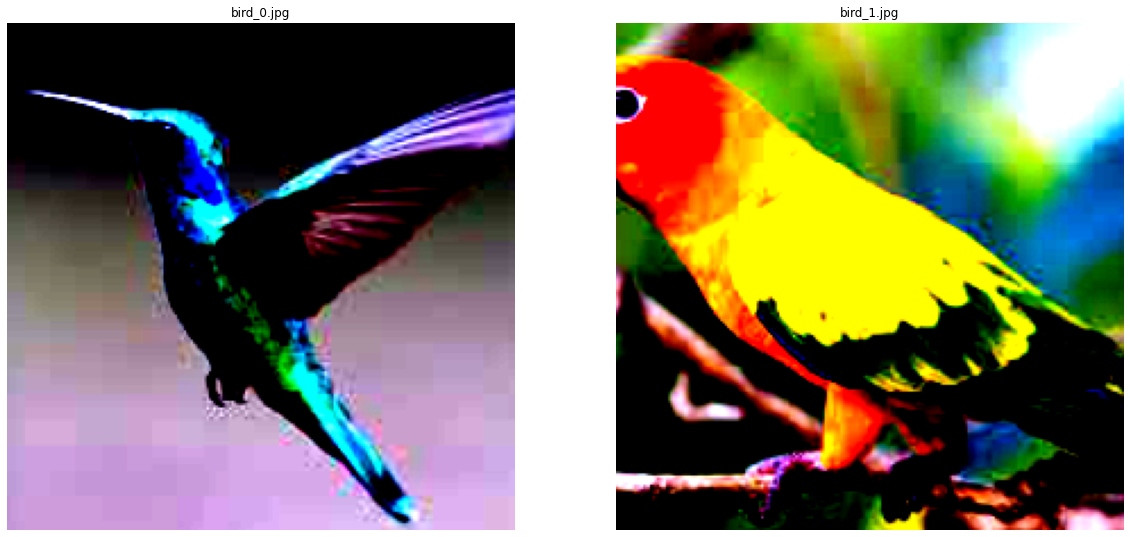

In [ ]:
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os


directory = "/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/birds"

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),             # Resize to larger edge of image
    transforms.CenterCrop(224),         # Crop center to match VGG input size
    transforms.ToTensor(),              # Convert image to tensor
    normalize                           # Normalize to match VGG training data
])

# List to hold preprocessed images
preprocessed_images = []

# Load and display images
fig, ax = plt.subplots(1, len(os.listdir(directory)), figsize=(20, 10))  # Adjust subplot parameters as needed
for i, img_name in enumerate(os.listdir(directory)):
    if img_name.endswith((".png", ".jpg", ".jpeg")):  # Check for valid image file
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert('RGB')  # Open and convert to RGB
        input_img = transform(img)  # Apply transformations
        preprocessed_images.append(input_img)  # Add the processed image to the list
        ax[i].imshow(input_img.permute(1, 2, 0))  # Permute tensor for displaying
        ax[i].set_title(img_name)
        ax[i].axis('off')  # Turn off axis

plt.show()


In [ ]:
import torch


images_batch = torch.stack(preprocessed_images, dim=0)

# Check if CUDA is available and if so, move the images to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images_batch = images_batch.to(device)
vgg16 = vgg16.to(device)


with torch.no_grad():  # Turn off gradients for prediction
    outputs = vgg16(images_batch)


probabilities = torch.nn.functional.softmax(outputs, dim=1)


_, top5_idxs = torch.topk(probabilities[0], 5)
top5_probabilities = probabilities[0][top5_idxs]


print("Top 5 Predicted Label Indices and their probabilities:")
top5_labels_indices = top5_idxs.cpu().numpy()
for idx, prob in zip(top5_labels_indices, top5_probabilities):
    print(f"Index {idx}: {prob.item()}")


Top 5 Predicted Label Indices and their probabilities:
Index 94: 0.9001175761222839
Index 95: 0.09975273162126541
Index 92: 0.00012755385250784457
Index 128: 7.368794854301086e-07
Index 20: 5.91999878452043e-07


In [ ]:
import json

# Load the ImageNet class index
with open('/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/imagenet_class_index.json', 'r') as f:
    imagenet_classes = json.load(f)


top1_index = top5_labels_indices[0]
top1_prob = top5_probabilities[0].item()
top1_label = imagenet_classes[str(top1_index)][1]

print(f"Top predicted label: {top1_label} with probability {top1_prob}")


Top predicted label: hummingbird with probability 0.9001175761222839


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


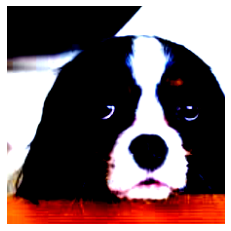

Top 5 Predicted Label Indices and their probabilities for the dog image:
Index 152: 0.534961998462677
Index 156: 0.4503611624240875
Index 157: 0.006370831746608019
Index 220: 0.002450767206028104
Index 219: 0.0009698256035335362


In [ ]:
# Load and preprocess the dog image
dog_img_path = '/Users/slwwyzmn/Desktop/97209/HW1/HW1_data_updated/dogs/dog_9.jpg'  # Change this to the path of your dog image
dog_img = Image.open(dog_img_path).convert('RGB')
preprocessed_dog_img = transform(dog_img)  # Apply the same transformations as before

# Display the dog image
plt.imshow(preprocessed_dog_img.permute(1, 2, 0))
plt.axis('off')  # Hide the axes
plt.show()


dog_img_batch = preprocessed_dog_img.unsqueeze(0).to(device)

# Feed the image through the model
with torch.no_grad():
    dog_outputs = vgg16(dog_img_batch)

# Convert outputs to probabilities
dog_probabilities = torch.nn.functional.softmax(dog_outputs, dim=1)

# Print the top 5 predictions
_, dog_top5_idxs = torch.topk(dog_probabilities[0], 5)
dog_top5_probabilities = dog_probabilities[0][dog_top5_idxs]
print("Top 5 Predicted Label Indices and their probabilities for the dog image:")
for idx, prob in zip(dog_top5_idxs.cpu().numpy(), dog_top5_probabilities):
    print(f"Index {idx}: {prob.item()}")


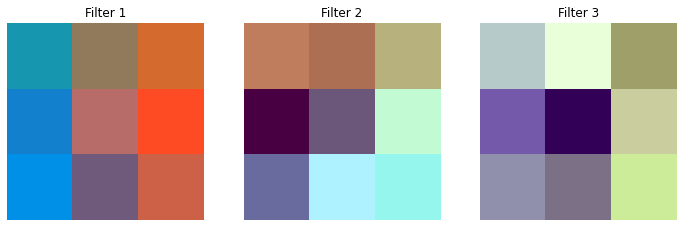

In [ ]:
import numpy as np

# Extract the first layer filters
first_layer_filters = vgg16.features[0].weight.data.cpu().numpy()

# Plot the first three filters
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, ax in enumerate(axes.flat):

    filter_img = first_layer_filters[i]

    min_val = np.min(filter_img)
    max_val = np.max(filter_img)
    normalized_filter = (filter_img - min_val) / (max_val - min_val)
    ax.imshow(normalized_filter.transpose(1, 2, 0))
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.show()


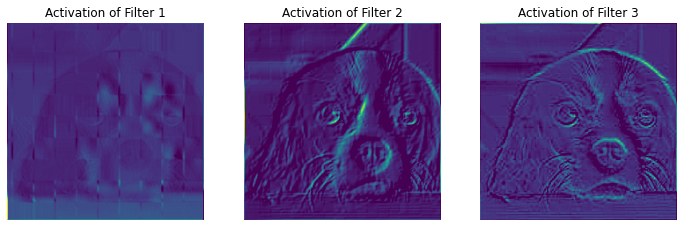

In [ ]:
import torch.nn as nn
# Define a new model that includes only the first convolutional layer of VGG16
class VGGFirstLayer(nn.Module):
    def __init__(self, original_model):
        super(VGGFirstLayer, self).__init__()
        self.features = nn.Sequential(*list(original_model.features.children())[:2])  # Up to the first ReLU

    def forward(self, x):
        x = self.features(x)
        return x

# Create a new instance of this model
vgg_first_layer = VGGFirstLayer(vgg16).to(device)

# Apply this model to the preprocessed dog image
with torch.no_grad():
    dog_first_layer_output = vgg_first_layer(dog_img_batch)  # Assuming 'dog_img_batch' is your preprocessed dog image batch

# Visualize the first three activation maps
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):

    activation = dog_first_layer_output[0, i].cpu().numpy()
    ax.imshow(activation, cmap='viridis')  # Using a colormap to represent activation strength
    ax.set_title(f'Activation of Filter {i+1}')
    ax.axis('off')
plt.show()


# Analysis of VGG16 First Layer Filters and Their Activation Maps

## Observations and Interpretations

### Filter 1: Detection of Vertical Edges and Lines
- **Observation**: The activation map for Filter 1 highlights vertical lines or edges within the image, indicating that the filter acts as an edge detector for vertical features.
- **Interpretation**: Vertical edges are common in natural images and are crucial for defining shapes and boundaries. The network uses these features as foundational elements for recognizing more complex patterns in subsequent layers.

### Filter 2: Detection of Color Contrast
- **Observation**: Filter 2's activation map lights up in areas with significant color contrast, suggesting that the filter is responsive to changes in color or brightness.
- **Interpretation**: Color and brightness variations are essential for differentiating objects and their features within an image. A filter that captures these variations aids the network in distinguishing between different elements, contributing to effective segmentation and recognition.

### Filter 3: Detection of Textures and Edges
- **Observation**: The activation map for Filter 3 reveals more detailed features, such as the dog's fur, indicating sensitivity to both texture and edge details.
- **Interpretation**: Textures provide vital information for differentiating surface properties and materials in an image. A filter that can capture both textures and edges allows the network to process a richer set of information, which is crucial for recognizing objects with complex surfaces and shapes.

## Conclusion
The analysis of the first layer filters in the VGG16 network reveals that the network starts understanding images by detecting fundamental visual elements such as edges, color contrasts, and textures. These basic elements serve as building blocks for the network to recognize more complex patterns and objects in later stages. This hierarchical approach in feature detection enables the network to manage the vast variability present in real-world visual data, laying the groundwork for effective image recognition.
